In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import os

In [2]:
path = '/Users/franzv/Desktop/dataSci/ds_projects/Pav58_Network/'
os.chdir(path)
os.getcwd()

'/Users/franzv/Desktop/dataSci/ds_projects/Pav58_Network'

In [3]:
# function for processing sheets and groups, specific for excel sheet Pav58_RawData
# ensure path is specified first
# filters R scores greater than 0.5 and are statistically siginificant correlations 

def process_sheet(raw_sheet_name='sheet_name', sig_sheet_name='sheet_name2'):
    raw_sheet = pd.read_excel('Pav58_RawData.xlsx', sheet_name=raw_sheet_name)
    raw_sheet.columns = raw_sheet.columns.str.lower()
    
    regions = list(raw_sheet.columns)

    # get correlations
    r_sheet = raw_sheet.corr()
    
    # drop index 
    r_sheet = r_sheet.reset_index().drop('index', axis=1)

    # filter r > 0.5
    r_sheet_filt = r_sheet[r_sheet >= 0.5]

    # process p-value sheet 
    sig_sheet = pd.read_excel('Pav58_RawData.xlsx', sheet_name=sig_sheet_name)
    sig_sheet = sig_sheet.drop('Unnamed: 0', axis=1)
    sig_sheet.columns = sig_sheet.columns.str.lower()

    sig_mask = sig_sheet < 0.05

    # apply mask where r values are significant 
    r_sheet_filt[regions] = r_sheet_filt[regions].where(sig_mask[regions]==True, None)
    r_sheet_filt[regions].astype(float)
    r_sheet_filt[regions] = r_sheet_filt[regions].round(2)

    #r_sheet_filt.insert(0, 'region', regions)
    

    return r_sheet_filt

In [4]:
p_recall = process_sheet('P_Recall_Raw', 'P_Recall_pCorr')
p_ext = process_sheet('P_Ext_Raw', 'P_Ext_pCorr')
up_recall = process_sheet('UP_Recall_Raw', 'UP_Recall_pCorr')
up_ext = process_sheet('UP_Ext_Raw', 'UP_Ext_pCorr')
hc_recall = process_sheet('HC_Recall_Raw', 'HC_Recall_pCorr')
hc_ext = process_sheet('HC_Ext_Raw', 'HC_Ext_pCorr')

In [5]:
# function to transform values from R to weights based on bins decided below
# 0.5 to 0.79 = 1
# 0.80 to 0.89 = 2
# 0.90 to 1.00 = 3

def transform_weight(df):
    df_wt = df.apply(pd.cut, bins=[0, 0.79, 0.89, 1.00], labels=['1', '2', '3'])
    return df_wt

In [6]:
p_recall_wt = transform_weight(p_recall)
p_ext_wt = transform_weight(p_ext)
up_recall_wt = transform_weight(up_recall)
up_ext_wt = transform_weight(up_ext)
hc_recall_wt = transform_weight(hc_recall)
hc_ext_wt = transform_weight(hc_ext)

In [19]:
regions = list(p_recall.columns)

In [21]:
for _ in [p_recall_wt, p_ext_wt, up_recall_wt, up_ext_wt, hc_recall_wt, hc_ext_wt]:
    _.insert(0, 'region', regions)

In [23]:
for _ in [p_recall, p_ext, up_recall, up_ext, hc_recall, hc_ext]:
    _.insert(0, 'region', regions)

In [29]:
display(hc_ext)
display(hc_ext_wt)

,region,il,pl,mofc,lofc,vofc,nacc,mnacsh,lnacsh,apvt,mpvt,ppvt,bla
0,il,NaN,NaN,NaN,NaN,0.89,NaN,NaN,NaN,NaN,NaN,NaN,0.97
1,pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.86
2,mofc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lofc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN
4,vofc,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92
5,nacc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mnacsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,NaN
7,lnacsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,apvt,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,mpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,region,il,pl,mofc,lofc,vofc,nacc,mnacsh,lnacsh,apvt,mpvt,ppvt,bla
0,il,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3
1,pl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,mofc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,lofc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
4,vofc,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5,nacc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mnacsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
7,lnacsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,apvt,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,mpvt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploratory Analysis for Deciding Bins

In [7]:
groups = [p_recall, p_ext, up_recall, up_ext, hc_recall, hc_ext]
all_groups = pd.concat(groups)

In [8]:
all_groups.describe()

,il,pl,mofc,lofc,vofc,nacc,mnacsh,lnacsh,apvt,mpvt,ppvt,bla
count,31.000000,19.000000,21.000000,22.000000,29.000000,25.000000,17.000000,23.000000,22.000000,19.000000,21.000000,21.000000
mean,0.834839,0.821053,0.821905,0.866364,0.836207,0.848800,0.857059,0.882609,0.867273,0.847895,0.829524,0.810000
std,0.088275,0.076077,0.097448,0.079913,0.084954,0.081308,0.083872,0.080522,0.093919,0.092471,0.092923,0.092898
min,0.700000,0.680000,0.700000,0.690000,0.700000,0.740000,0.710000,0.720000,0.700000,0.730000,0.700000,0.680000
25%,0.760000,0.775000,0.740000,0.800000,0.770000,0.780000,0.780000,0.835000,0.800000,0.750000,0.730000,0.750000
50%,0.820000,0.800000,0.800000,0.880000,0.820000,0.830000,0.880000,0.900000,0.890000,0.850000,0.820000,0.800000
75%,0.900000,0.865000,0.900000,0.930000,0.920000,0.920000,0.930000,0.950000,0.950000,0.935000,0.900000,0.860000
max,0.980000,0.940000,0.980000,0.960000,0.970000,0.970000,0.980000,0.990000,0.990000,0.990000,0.970000,0.990000


In [9]:
# join all to one column
all_group_stacked = all_groups.stack(dropna=True)

In [10]:
# select only column with values
all_group_stacked = all_group_stacked.reset_index().iloc[:,2]

In [11]:
all_group_stacked.describe()

count    270.000000
mean       0.843556
std        0.087862
min        0.680000
25%        0.770000
50%        0.850000
75%        0.930000
max        0.990000
Name: 0, dtype: float64

<AxesSubplot:xlabel='0', ylabel='Count'>

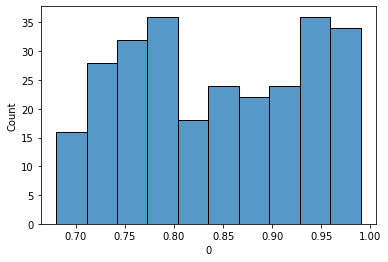

In [12]:
sns.histplot(all_group_stacked)

In [13]:
test_cut = pd.cut(all_group_stacked, bins=[0, 0.79, 0.89, 1.00])

In [14]:
test_cut.value_counts()

(0.0, 0.79]     94
(0.89, 1.0]     94
(0.79, 0.89]    82
Name: 0, dtype: int64

In [15]:
# testing stacks worked 
print(all_group_stacked[all_group_stacked == 0.79])
print(test_cut.iloc[44])

44     0.79
55     0.79
78     0.79
97     0.79
118    0.79
136    0.79
140    0.79
146    0.79
Name: 0, dtype: float64
(0.0, 0.79]
